Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 3


## Assignment
- [ ] [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Continue to participate in our Kaggle challenge. 
- [ ] Use scikit-learn for hyperparameter optimization with RandomizedSearchCV.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Reading
- Jake VanderPlas, [Python Data Science Handbook, Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), Hyperparameters and Model Validation
- Jake VanderPlas, [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=107)
- Ron Zacharski, [A Programmer's Guide to Data Mining, Chapter 5](http://guidetodatamining.com/chapter5/), 10-fold cross validation
- Sebastian Raschka, [A Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb)
- Peter Worcester, [A Comparison of Grid Search and Randomized Search Using Scikit Learn](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

### Doing
- In additon to `RandomizedSearchCV`, scikit-learn has [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Another library called scikit-optimize has [`BayesSearchCV`](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html). Experiment with these alternatives.
- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categorcals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### BONUS: Stacking!

Here's some code you can use to "stack" multiple submissions, which is another form of ensembling:

```python
import pandas as pd

# Filenames of your submissions you want to ensemble
files = ['submission-01.csv', 'submission-02.csv', 'submission-03.csv']

target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)
```

In [ ]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module3')

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [4]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')
train,val = train_test_split(train,random_state = 32,stratify=train['status_group'],test_size=0.20)
train.shape, test.shape

((47520, 41), (14358, 40))

In [5]:
#After doing exhaustive study of data both graphically and by basic functions , the following are the observations
#Not relevant or too many null vaues funder, installer,scheme_name,num_private,scheme_name
#High cardinality wpt_name,subvillage,lga,ward
#remove region code as region is considered
#remove scheme_management as management is considered
#constant value recorded_by
#keeping extraction_type and removing extraction_type_group and extraction_type_class
#payment_type and payment are same
#removing waterpoint_type_group as it can be replaced with waterpoint_type
#keeping water_quality as same as quality_group
#quantity_group and quantity are same
#source and source_type are same 

drop_columns = ['funder','installer','scheme_name','scheme_name','scheme_management','wpt_name',
                'subvillage','lga','ward','recorded_by','extraction_type_group','extraction_type_class',
                'payment_type','waterpoint_type_group','quality_group','quantity_group','source_type','id','num_private','region_code']
#To avoid copy setting warning, creating a copy of the datasets
train = train.copy()
val = val.copy()

train.drop(columns=drop_columns,inplace=True)
val.drop(columns=drop_columns,inplace=True)
test.drop(columns=drop_columns,inplace=True)
train['latitude'] = train['latitude'].replace(-2e-08, 0)
val['latitude'] = val['latitude'].replace(-2e-08, 0)
test['latitude'] = test['latitude'].replace(-2e-08, 0)

In [6]:
#function to replace zero values with nan
def make_zero_nan(data,col):
  X = data.copy()
  X[col]=X[col].replace(0,np.NaN)
  return X

#function to replace nan values with a give value
def replace_nan(data,col,value):
    X = data.copy()
    X[col]=X[col].replace(np.NaN,value)
    return X

def feature_addition(data):
  X = data.copy()
  X['date_recorded']=pd.to_datetime(X['date_recorded'],infer_datetime_format=True).dt.year
  X['since_construction']=X['date_recorded']-X['construction_year']
  X['district_code']=X['district_code'].astype('str')
  X['public_meeting']=X['public_meeting'].fillna(True).astype(int)
  X['permit']=X['permit'].fillna(True).astype(int)
  return X

In [7]:
nan_columns = ['latitude','longitude','construction_year','amount_tsh']
for col in nan_columns:
  train = make_zero_nan(train,col)
  val = make_zero_nan(val,col)
  test = make_zero_nan(test,col)

#Replacing construction year of zero values with minimum construction year
min_year = train['construction_year'].min()
train = replace_nan(train,'construction_year',min_year)
val = replace_nan(val,'construction_year',min_year)
test = replace_nan(test,'construction_year',min_year)

train = feature_addition(train)
val = feature_addition(val)
test = feature_addition(test)

first_recording = train['date_recorded'].min()
#creating a new column measuring the record date since the first recording
train['days_since']= (train['date_recorded'] - first_recording).astype(int)/86400000000000
val['days_since']= (val['date_recorded'] - first_recording).astype(int)/86400000000000
test['days_since']= (test['date_recorded'] - first_recording).astype(int)/86400000000000

In [57]:
target = 'status_group'
features = train.columns.drop([target,'date_recorded'])
Y_train = train[target]
Y_val = val[target]
X_train = train[features]
X_val = val[features]
#making a pipeline for model testing

for i in range(39,40):
  

  pipeline = make_pipeline(
      ce.OneHotEncoder(use_cat_names=True),
      SimpleImputer(),
      RobustScaler(),
      #DecisionTreeClassifier(random_state=32,min_samples_leaf=20,max_depth=i)
      #LGBMClassifier(max_depth=8,learning_rate=0.03,n_estimators=1500,min_child_samples=20)
      RandomForestClassifier()
      

  )
  #pipeline.fit(X_train,Y_train)
  scores = cross_val_score(pipeline,X_train,Y_train,cv=5,)
  print(scores,"Mean: ",scores.mean())
  # pred_train = pipeline.predict(X_train)
  # y_pred = pipeline.predict(X_val)
  # print("Training Score:",accuracy_score(Y_train,pred_train)," Depth:",i)
  # print("Val Score:",accuracy_score(Y_val,y_pred)," Depth:",i)

[0.80841662 0.80904787 0.79734848 0.80555556 0.80561987] Mean:  0.8051976804555266


In [58]:
pipeline.fit(X_train,Y_train)
pred_train = pipeline.predict(X_train)
y_pred = pipeline.predict(X_val)
print("Training Score:",accuracy_score(Y_train,pred_train))
print("Val Score:",accuracy_score(Y_val,y_pred))


Training Score: 0.9470959595959596
Val Score: 0.809006734006734


In [14]:
#predicting for test values
predictions = pipeline.predict(test[features])
sample_submission.status_group = predictions
sample_submission.to_csv('kaggle-submission-13.csv',index=False)

In [53]:
importances = pd.Series(dict(zip(pipeline['onehotencoder'].transform(X_val).columns,pipeline['randomforestclassifier'].feature_importances_)))

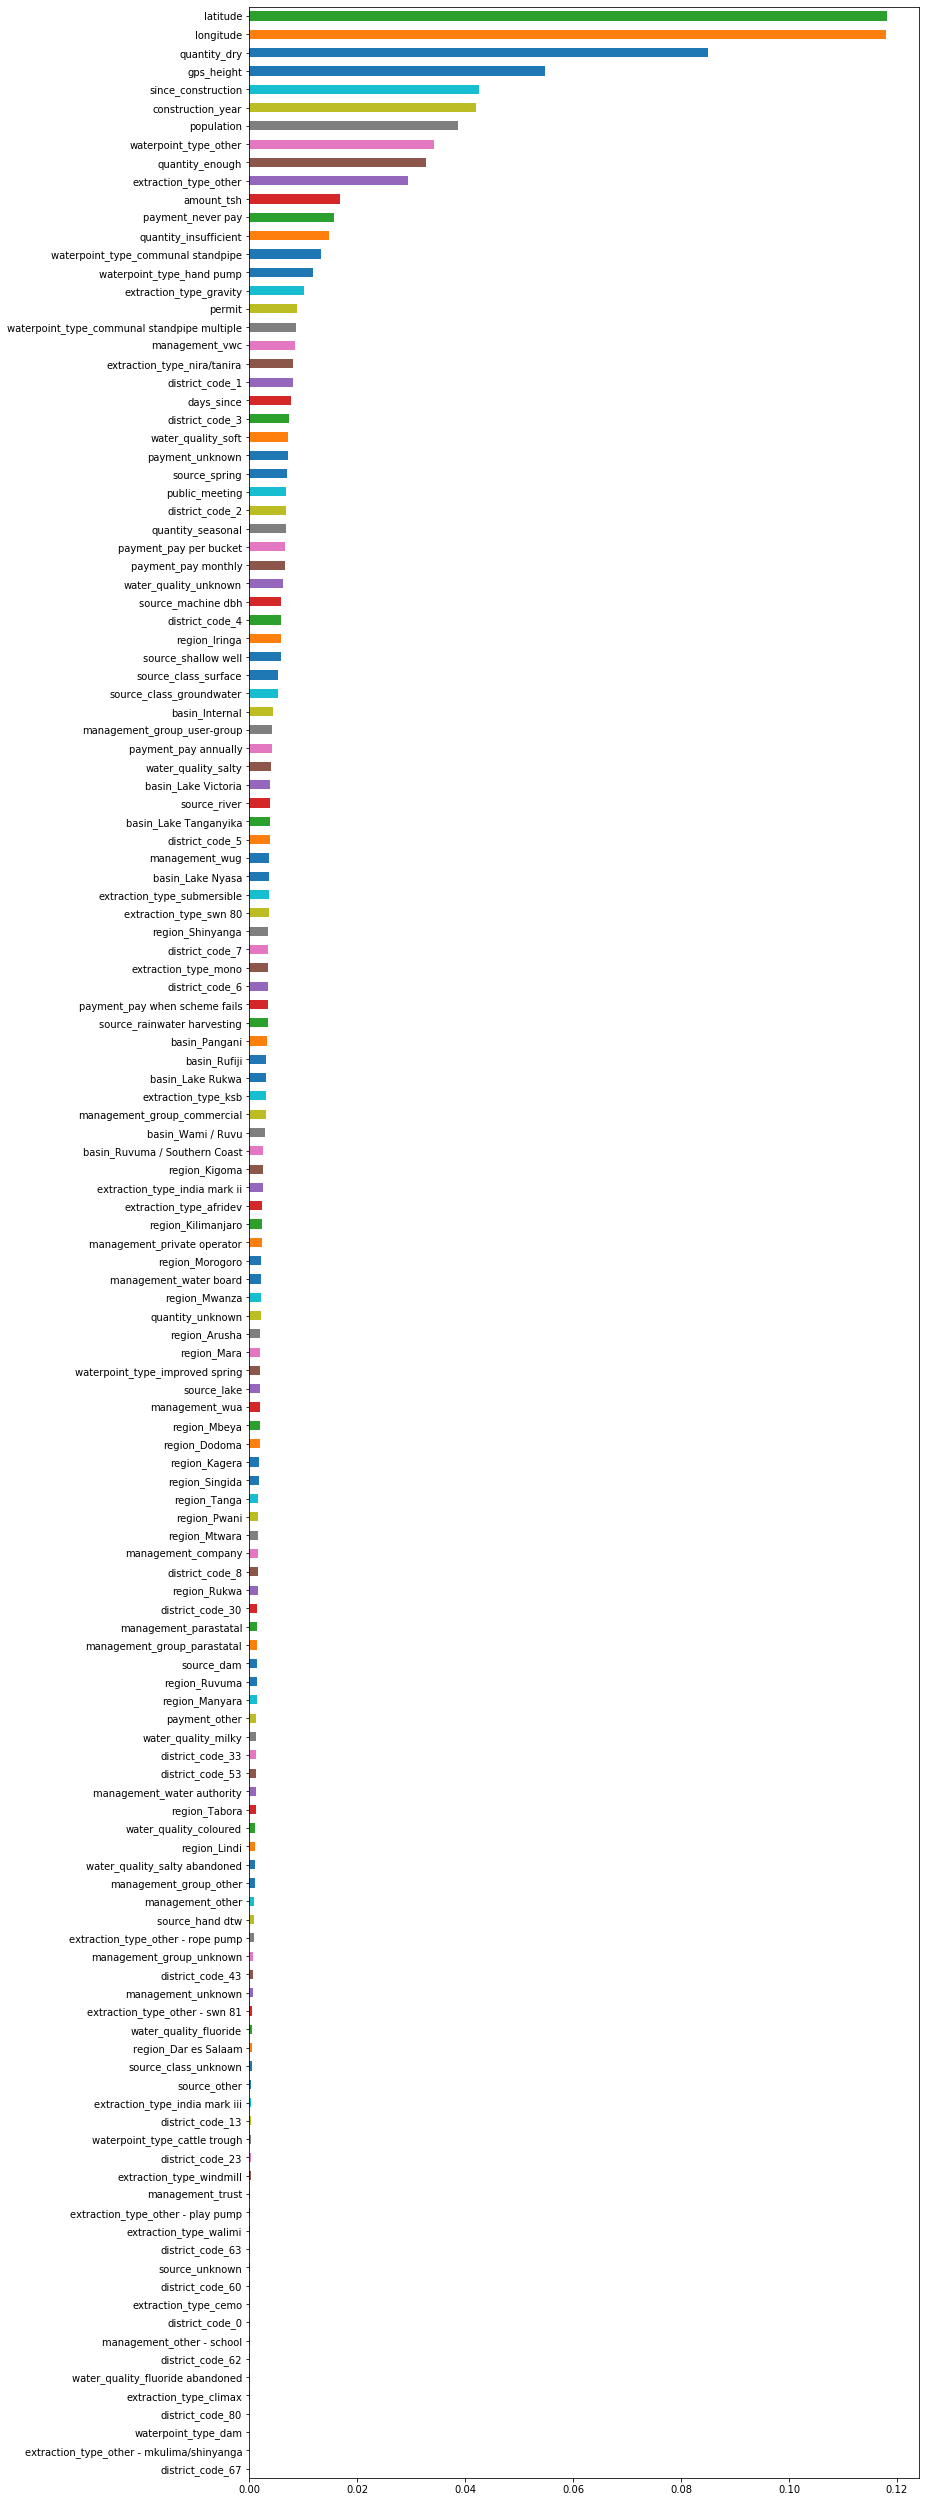

In [55]:
fig = plt.figure(figsize=(12,100))
ax = fig.add_subplot(211)
importances.sort_values().plot(kind='barh',ax=ax);

In [71]:
params = {
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1),
    
}

In [72]:
randomsearch = RandomizedSearchCV(pipeline,params,n_iter=10,cv=5)

In [ ]:
%%time
randomsearch.fit(X_train, Y_train);